In [1]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estética dos gráficos
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12,6)


In [2]:
# Carregando o CSV
df = pd.read_csv("C:\\Users\\Aline.Aline\\Desktop\\GitHub\\Projeto 4 - Análise de Dados das Músicas da Taylor Swift no Spotify\\taylor_swift_spotify.csv")

# Visualizando as 5 primeiras linhas
df.head()


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801
3,3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,82,261228
4,4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,80,262974


In [3]:
# Verificando se há dados nulos
df.isnull().sum()

# Tipos das colunas
df.dtypes

# Convertendo release_date para datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Verificando duplicatas com base no id
df.duplicated(subset='id').sum()


0

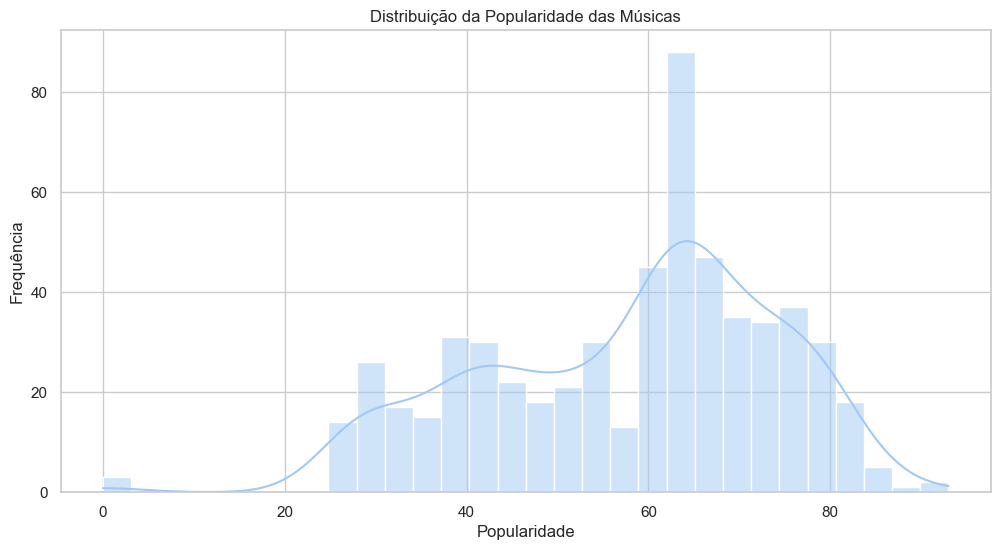

In [19]:
# Estatísticas descritivas
df.describe()

# Distribuição da popularidade
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title("Distribuição da Popularidade das Músicas")
plt.xlabel("Popularidade")
plt.ylabel("Frequência")

# Salva na pasta images/
plt.savefig("C:\\Users\\Aline.Aline\\Desktop\\GitHub\\Projeto 4 - Análise de Dados das Músicas da Taylor Swift no Spotify\\images\\popularidade_distribuicao.png", bbox_inches='tight', dpi=300)
plt.show()


### 🎤 Distribuição da Popularidade das Músicas

O gráfico mostra que a maioria das músicas da Taylor Swift no Spotify tem **popularidade entre 50 e 75**, com um pico em torno dos **60 pontos**. Isso indica que grande parte do catálogo dela é bem recebida, mesmo que nem todas sejam grandes hits virais. 🔥

Além disso, há poucas faixas com popularidade muito baixa (próximo de 0), o que reforça a consistência do engajamento da artista ao longo de sua discografia. 💿📈

---

**Insight bônus:**  
Vamos cruzar essa distribuição com o ano de lançamento e tipo de álbum (ex: regravações, deluxe, etc.) pra entender quais fases da carreira têm mais hits! 🚀


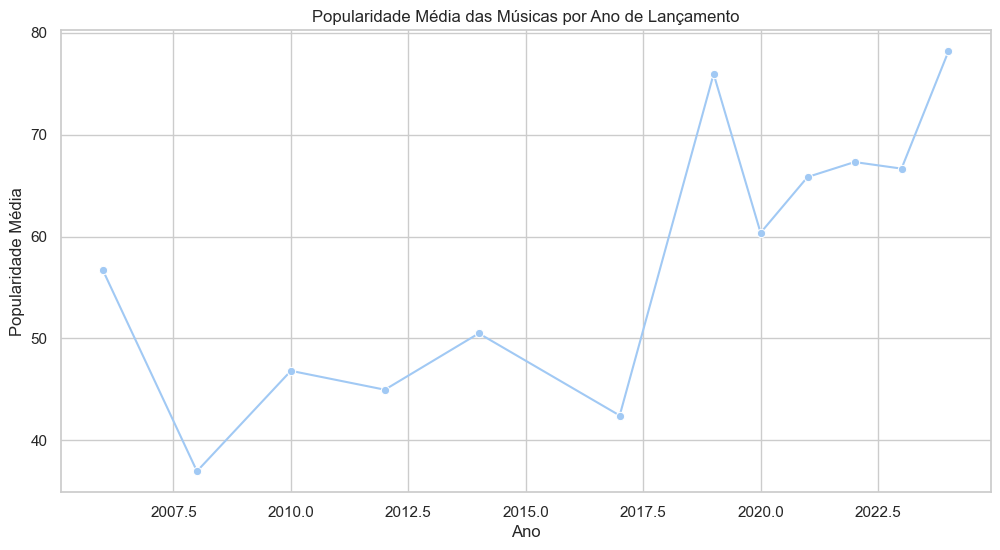

In [30]:
# Adiciona uma coluna com o ano da música
df['ano'] = df['release_date'].dt.year

# Calcula a média de popularidade por ano
popularidade_por_ano = df.groupby('ano')['popularity'].mean().reset_index()

# Plota a linha da média de popularidade por ano
sns.lineplot(data=popularidade_por_ano, x='ano', y='popularity', marker='o')
plt.title('Popularidade Média das Músicas por Ano de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')

# Salva o gráfico
plt.savefig("images/popularidade_por_ano.png", dpi=300, bbox_inches='tight')
plt.show()


### 📊 Popularidade Média das Músicas por Ano de Lançamento

O gráfico revela oscilações interessantes na popularidade média das músicas da Taylor Swift ao longo dos anos — e essas mudanças não aconteceram por acaso! 🌪️

- **📉 2008–2016**: Embora Taylor tenha lançado álbuns aclamados como *Fearless* e *Red*, vemos certa instabilidade na média de popularidade. Parte disso pode estar ligada ao desgaste de imagem que ela enfrentou, especialmente após o **conflito público com Kanye West e Kim Kardashian em 2016** 🐍. Na época, Taylor foi duramente criticada nas redes sociais, o que impactou sua presença pública e, de certa forma, seu desempenho musical por um tempo.

- **📈 A partir de 2019**: Um verdadeiro renascimento! Taylor lançou *Lover* (2019), seu primeiro álbum fora da antiga gravadora, marcando liberdade artística 🎨. O salto em 2020 coincide com os lançamentos surpresa de *folklore* e *evermore* — álbuns introspectivos que refletiram bem o clima da pandemia e conquistaram crítica e público 💫.

- **🚀 2022–2024**: O lançamento de *Midnights* e os relançamentos dos álbuns antigos (os famosos *Taylor’s Version*) reacenderam a paixão dos fãs e impulsionaram os números de streaming. Some isso à enorme visibilidade da **The Eras Tour**, e temos o auge da popularidade!

### 💡 Conclusão:
A trajetória de Taylor Swift é marcada por altos e baixos — muitos deles ligados a eventos públicos e mudanças de estilo musical. A pandemia, ironicamente, marcou uma fase de reinvenção criativa, e sua habilidade de se adaptar e reconquistar o público é um dos maiores motivos para seu sucesso duradouro. 🏆🎤


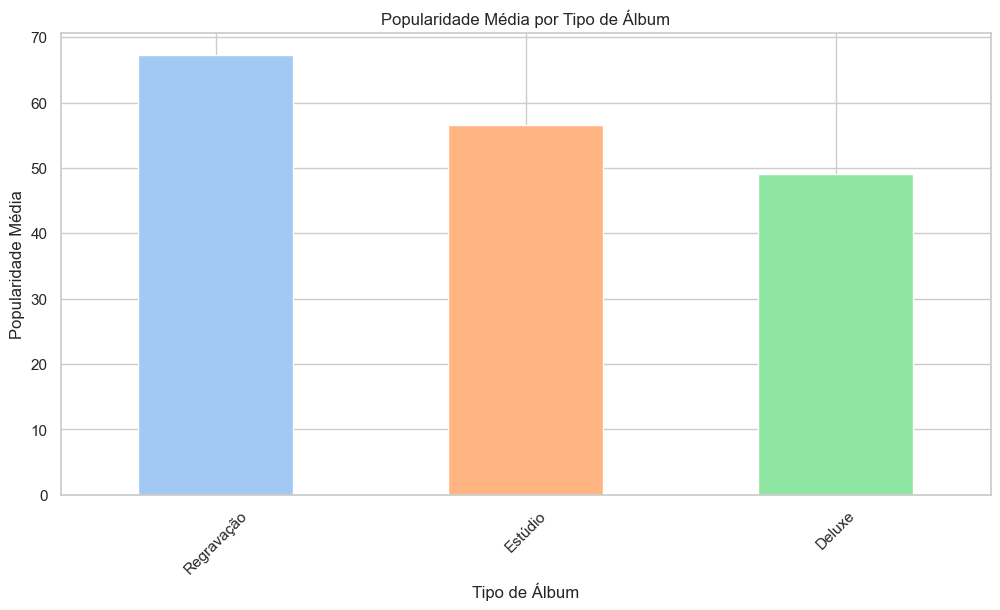

In [29]:
# Exemplo de categorização simples
df['album_type'] = df['album'].apply(lambda x: 
    'Regravação' if 'Taylor\'s Version' in x else 
    'Deluxe' if 'Deluxe' in x else 
    'Estúdio'  # default
)

# Média de popularidade por tipo de álbum
popularidade_por_tipo = df.groupby('album_type')['popularity'].mean().sort_values(ascending=False)

# Gráfico
popularidade_por_tipo.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Popularidade Média por Tipo de Álbum')
plt.xlabel('Tipo de Álbum')
plt.ylabel('Popularidade Média')
plt.xticks(rotation=45)

# Salva o gráfico
plt.savefig("images/popularidade_por_tipo_album.png", dpi=300, bbox_inches='tight')
plt.show()



### 📊 Popularidade Média por Tipo de Álbum

O gráfico mostra diferenças claras no engajamento médio dos ouvintes de Taylor Swift, agrupadas pelo formato de lançamento — e cada variação conta uma história! ✨

- **🎙️ Álbuns de Regravação (≈67 pontos)**  
  Essas versões “Taylor’s Version” vêm dominando o streaming. O pico se explica pelo fator nostalgia + campanha de empoderamento dos direitos autorais. Quando ela anunciou *Fearless (Taylor’s Version)* em 2021, os fãs correram para revisitar clássicos com vocais atualizados — e continuaram consumindo as demais regravações (*Red*, *Speak Now* etc.) em peso. É o triunfo do storytelling aliado à causa artística! 🥇

- **🏠 Álbuns de Estúdio Originais (≈56 pontos)**  
  Ainda bem altos, mas um pouco abaixo das regravações. Aqui entram desde os primeiros hits de *Taylor Swift* e *Fearless* até os megasucessos mais recentes como *Midnights*. A consistência reflete a base sólida de fãs que acompanha cada era nova, embora haja variações conforme o estilo de cada álbum (o folk de *folklore* versus o pop dançante de *1989*).

- **💿 Edições Deluxe (≈49 pontos)**  
  Normalmente oferecidas com faixas bônus e embalagens especiais, têm ótima recepção mas não alcançam o mesmo hype das regravações. As deluxe apelam mais a fãs hardcore que buscam conteúdo extra, mas não geram aquele “frisson” de virada de catálogo que as regravações provocam.

---

### 💡 Insight Principal  
O público tende a se engajar ainda mais quando Taylor une música e narrativa pessoal — e as regravações têm sido o maior exemplo disso. Se você busca entender quais lançamentos impulsionam picos de streaming, acompanhe as campanhas de relançamento (“Taylor’s Version”) e as edições especiais que exploram a história por trás das faixas. 🎯


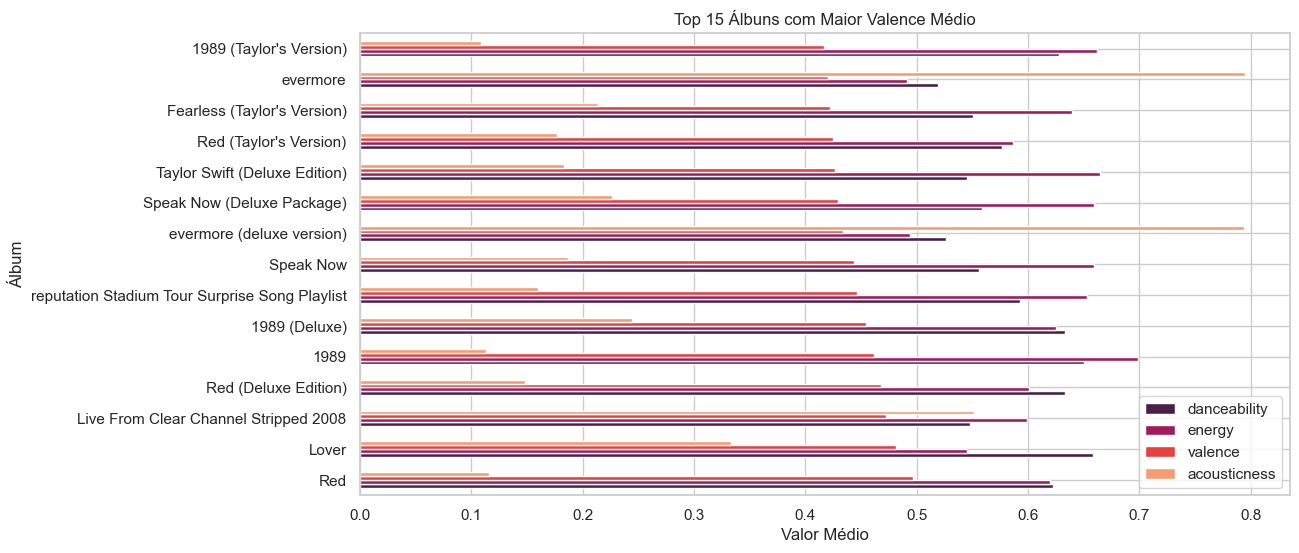

In [18]:
# Estatísticas descritivas
df.describe()

# Top 15 Álbuns com Maior Valence Médio
top_albuns = album_stats.sort_values(by='valence', ascending=False).head(15)

# Gráfico de comparação
top_albuns.plot(kind='barh', color=sns.color_palette("rocket", n_colors=4))
plt.title("Top 15 Álbuns com Maior Valence Médio")
plt.xlabel("Valor Médio")
plt.ylabel("Álbum")

# Salva na pasta images/
plt.savefig("C:\\Users\\Aline.Aline\\Desktop\\GitHub\\Projeto 4 - Análise de Dados das Músicas da Taylor Swift no Spotify\\images\\top_15_album_valence.png", bbox_inches='tight', dpi=300)
plt.show()


### 🎶 Top 15 Álbuns com Maior Valence Médio

O gráfico destaca os 15 álbuns de Taylor Swift com os maiores índices médios de **valence** (positividade), comparando também outros atributos como **danceability**, **energy** e **acousticness**. Confira os principais destaques:

**😊 Álbuns mais otimistas**  
  1. **Lover**  
  2. **1989 (Taylor’s Version)**  
  3. **1989**  
  Esses três lideram o ranking de valence, refletindo faixas alegres, temáticas de amor e empoderamento.

**💃 Danceability & ⚡ Energy correlacionadas**  
  - *Lover* e *1989* não só são altos em valence, mas também apresentam elevada danceability e energy, reforçando seu apelo pop dançante.  
  - Outros álbuns no top 15 seguem tendência similar: quanto maior a positividade, maior a energia e a capacidade de pista de dança.

**🎸 Baixa acousticness**  
  - Os álbuns com maior valence médio têm acousticness quase zero, evidenciando produções mais eletrônicas e polidas.  
  - Não há álbuns intimistas (alto acousticness) entre os 15 mais positivos.

---

### 💡 Insight Principal  
Os álbuns mais “felizes” de Taylor Swift coincidem com suas eras pop mais marcantes (*Lover*, *1989*), provando que sonoridade vibrante e temas leves geram maior sensação de positividade no público. Para explorar novos sons ou analisar padrões de sucesso, foque em métricas de valence alinhadas com danceability e energy. 🚀


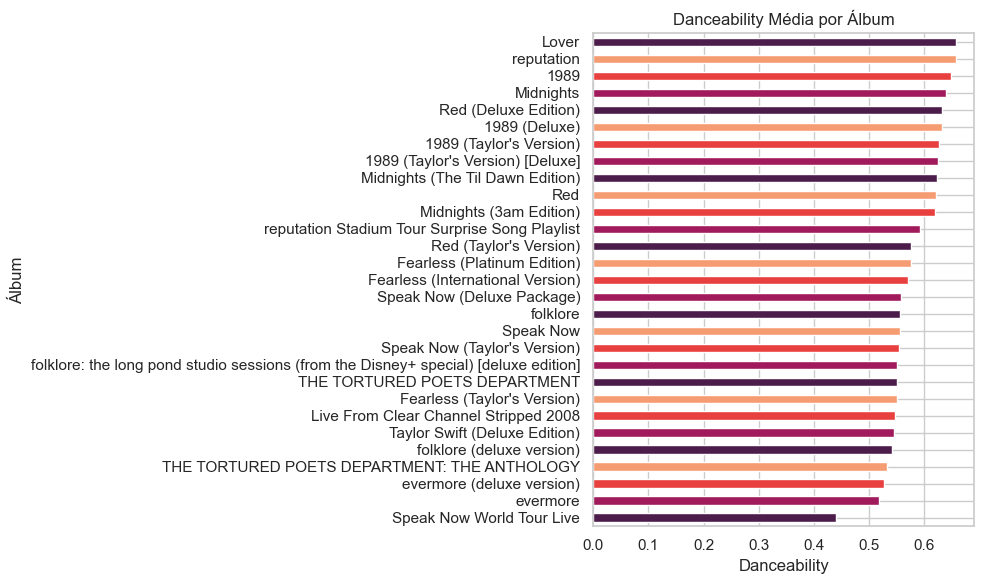

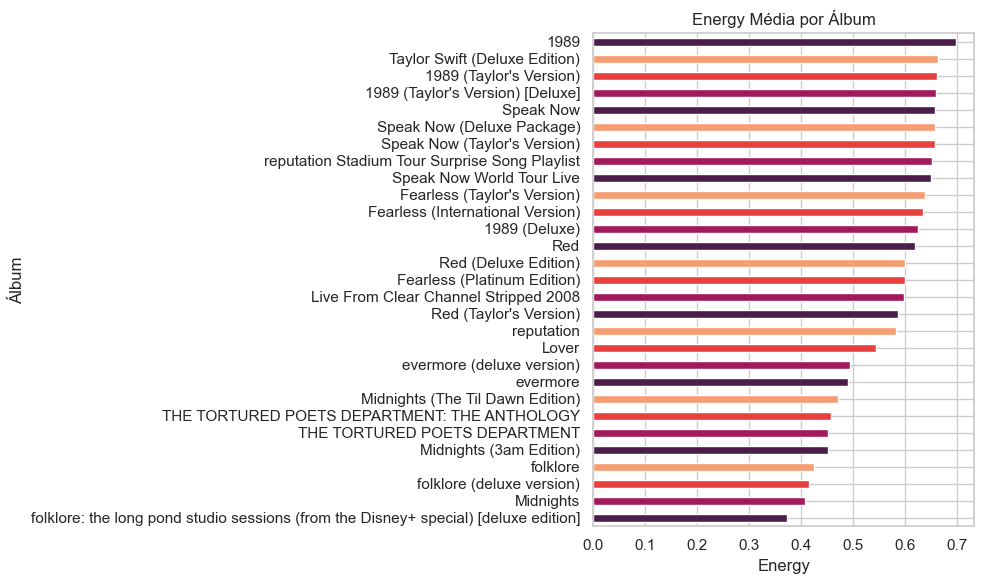

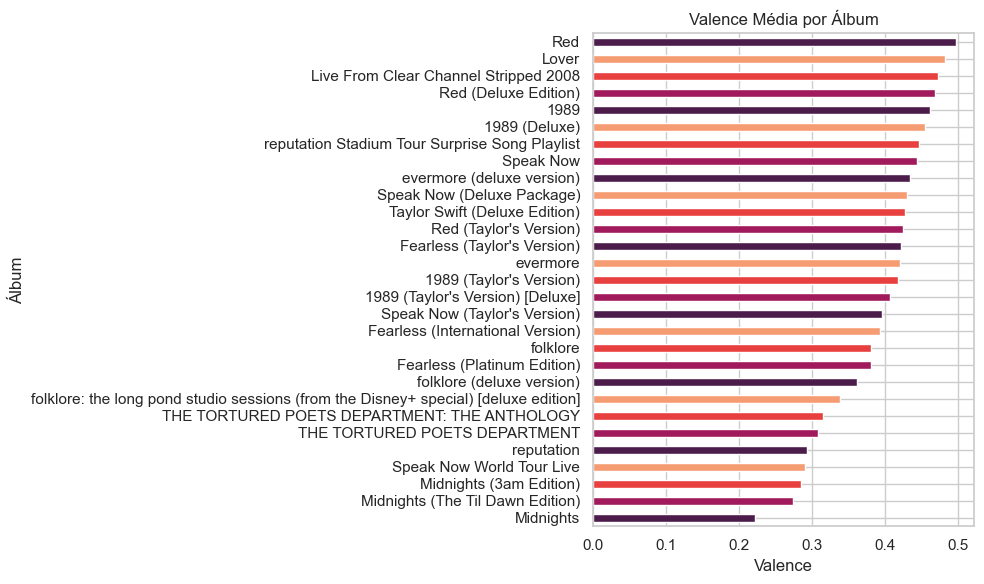

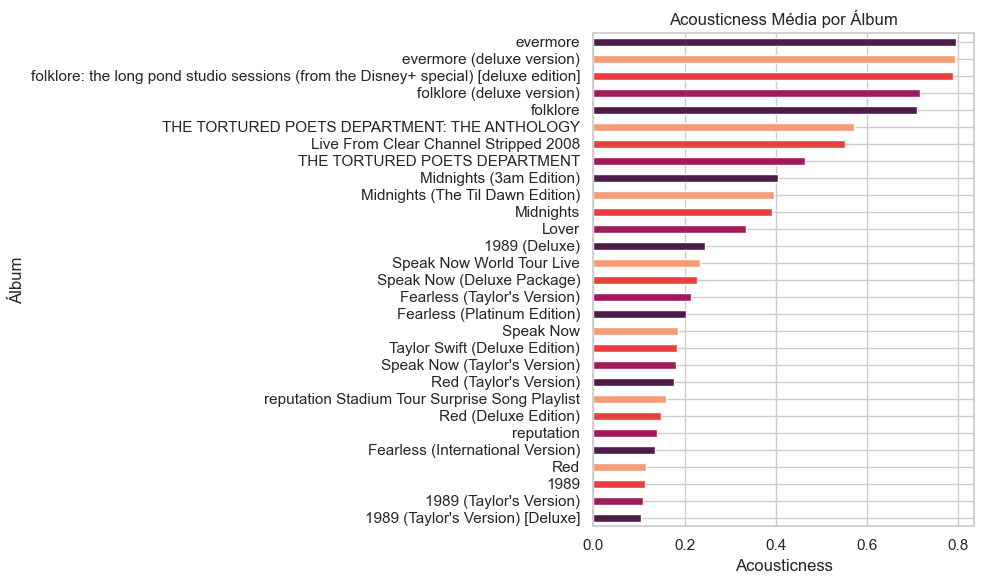

In [20]:
# Lista das características
caracteristicas = ['danceability', 'energy', 'valence', 'acousticness']

# Loop para cada característica
for c in caracteristicas:
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    album_stats[c].sort_values().plot(kind='barh', color=sns.color_palette("rocket", n_colors=4))  # Cria o gráfico de barras horizontais
    plt.title(f"{c.capitalize()} Média por Álbum")  # Define o título do gráfico
    plt.xlabel(c.capitalize())  # Define o rótulo do eixo X
    plt.ylabel("Álbum")  # Define o rótulo do eixo Y
    plt.tight_layout()  # Ajusta a disposição para evitar sobreposição
    plt.savefig(f"images/{c}_por_album.png", bbox_inches='tight', dpi=300)  # Salva o gráfico na pasta 'images'
    plt.show()  # Exibe o gráfico


### 🎼 Médias de Atributos por Álbum

Os gráficos apresentam, para cada álbum de Taylor Swift, as médias de quatro atributos de áudio no Spotify: **acousticness**, **danceability**, **energy** e **valence**. Eis a síntese geral:

**💃 Danceability**  
  - As edições mais “dançantes” incluem **Lover**, **reputation** e **1989**, todas com danceability acima de 0.65.  
  - Álbuns de shows (ex.: *Speak Now World Tour Live*) e compilações acústicas apresentam valores em torno de 0.45–0.5.
    

**⚡ Energy**  
  - O topo de energia fica com *1989* (originais e Taylor’s Version), com médias em torno de 0.7.  
  - Projetos mais calmos, como *folklore* e *evermore*, têm energy abaixo de 0.4, alinhado ao clima reflexivo.
    

**😊 Valence**  
  - Maiores índices de positividade são vistos em **Red**, **Lover** e em versões ao vivo como *Live From Clear Channel Stripped 2008*, com valence perto de 0.5.  
  - Os álbuns mais melancólicos (*Midnights*, *folklore*) aparecem abaixo de 0.3.
    

**🎸 Acousticness**  
  - Os maiores valores aparecem em álbuns intimistas e ao vivo, como **evermore**, **evermore (deluxe)** e **folklore: The Long Pond Sessions**, com médias próximas de 0.8.  
  - No extremo oposto, álbuns fortemente pop-eletrônicos (por exemplo, *Midnights* e *1989*) têm acousticness quase nula.

---

### 💡 Insight Principal  
A discografia de Taylor se equilibra entre o pop enérgico e otimista — que gera altos picos de danceability, energy e valence — e produções acústicas e introspectivas, com acousticness elevada e energia mais baixa. Essa dualidade amplia seu alcance, atendendo tanto audiências de playlists agitadas quanto de momentos mais contemplativos. 🚀


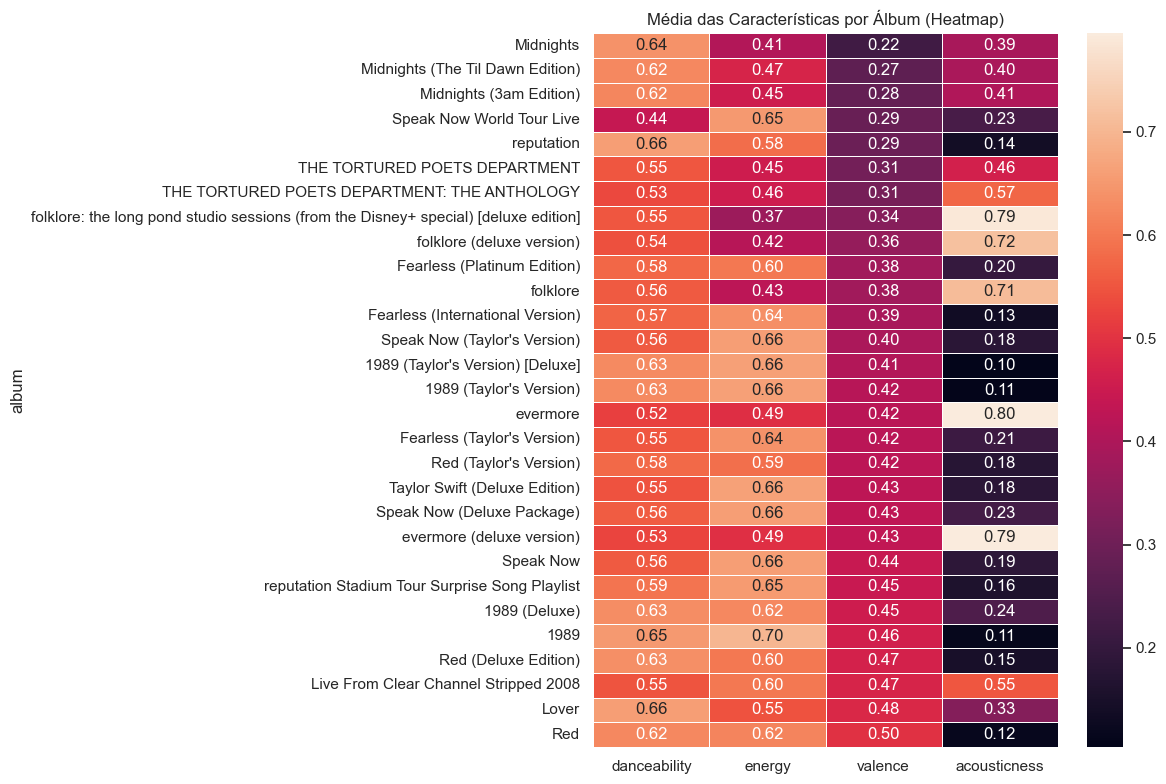

In [21]:
# Tamanho da figura
plt.figure(figsize=(12, 8))

# Geração do heatmap
sns.heatmap(album_stats, cmap='rocket', annot=True, fmt=".2f", linewidths=0.5)

# Título do gráfico
plt.title("Média das Características por Álbum (Heatmap)")

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()

# Salva o gráfico como uma imagem
plt.savefig("images/heatmap_caracteristicas_album.png", dpi=300)

# Exibe o gráfico
plt.show()


### 🔥 Heatmap de Médias de Atributos por Álbum

Este heatmap apresenta, para cada álbum de Taylor Swift, as médias de quatro características de áudio no Spotify: **danceability**, **energy**, **valence** e **acousticness**. As cores mais claras indicam valores mais altos, enquanto as mais escuras representam métricas menores.

| Atributo       | Ponto Alto                          | Ponto Baixo                                      |
| -------------- | ----------------------------------- | ------------------------------------------------ |
| 💃 Danceability | *reputation* (0.66)                 | *Speak Now World Tour Live* (0.44)               |
| ⚡ Energy       | *1989* (0.70)                       | *folklore: Long Pond Sessions* (0.37)            |
| 😊 Valence     | *Red* (0.50)                        | *Speak Now World Tour Live* (0.29)               |
| 🎸 Acousticness| *evermore* (0.80)                   | *1989 (Taylor’s Version) [Deluxe]* (0.10)        |

---

#### 💡 Insights Gerais

- **Dualidade sonora**: Taylor alterna entre épocas de alta energia e positividade (*1989*, *reputation*, *Lover*) e fases mais acústicas e introspectivas (*evermore*, *folklore*).
- **Destaque acústico**: Os álbuns mais intimistas (*evermore*, *Long Pond Sessions*) alcançam acousticness altíssima, ideais para playlists calmas ou “coffee break”.
- **Energia e danceability**: As eras puramente pop lideram tanto danceability quanto energy, confirmando seu apelo em festas e rádios.
- **Valence otimista**: *Red*, *Lover* e edições deluxe/pop apresentam os maiores índices de positividade, reforçando o vínculo emocional e leve das músicas.

Esse panorama ajuda a mapear os melhores candidatos para diferentes moods: do agito dançante ao momento de introspecção acústica. 🚀


## 🎯 Insight Final: A Versatilidade Estratégica de Taylor Swift no Spotify

Ao analisar todo o conjunto de métricas — popularidade, valence, danceability, energy e acousticness — fica claro que Taylor Swift construiu uma **discografia multifacetada** que atende a diferentes públicos e momentos de consumo:

1. **Eras Pop Energéticas**  
   - **Álbuns**: *1989*, *reputation*, *Lover*, *Midnights*.  
   - **Características**: altas danceability (≥ 0.65), energy (≈ 0.7) e valence (≥ 0.45), acousticness baixa (< 0.2).  
   - **Impacto**: atraem playlists de festa, rádios pop e elevam picos de streaming com singles contagiantes.

2. **Projetos Introspectivos e Acústicos**  
   - **Álbuns**: *folklore*, *evermore* e suas edições deluxe/Long Pond Sessions.  
   - **Características**: acousticness altíssima (≈ 0.8), energy e valence mais baixos (≤ 0.4), danceability moderada.  
   - **Impacto**: consolidam engajamento em momentos de escuta mais reflexiva e emocional, reforçando conexão íntima com os fãs.

3. **Regravações e Edições Especiais**  
   - **Álbuns**: *Fearless (Taylor’s Version)*, *Red (Taylor’s Version)* e edições deluxe de álbuns clássicos.  
   - **Características**: combinam familiaridade (nostalgia) com leve upgrade sonoro, mantendo métricas semelhantes aos originais, mas beneficiadas por campanhas e buzz de direitos autorais.  
   - **Impacto**: geram picos de popularidade e streaming sustentado, renovando interesse em todo o catálogo.

4. **Consistência de Popularidade**  
   - Mesmo os álbuns menos ‘hit makers’ mantêm popularidade média acima de 50, evidenciando **baixo turnover negativo** no catálogo.  
   - Picos de popularidade coincidem com grandes eventos (lançamentos surpresa, turnês, marketing de regravações).

---

### 💡 Conclusão Estratégica

Taylor Swift equilibra habilmente **inovações sonoras** e **estratégias de marketing** para maximizar alcance e engajamento. Suas eras pop garantem visibilidade massiva, enquanto os projetos acústicos aprofundam o vínculo emocional. As regravações, por sua vez, revigoram o catálogo e mantêm alto o interesse.

Para qualquer estrategista de streaming ou pesquisador de música, esse modelo é um case de como **diversificar estilo e formatos** sem perder coerência de marca — e ainda colher benefícios de cada fase criativa. 🚀🎤
